In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
df = pd.read_excel("./datasets/marketing-campaign.xlsx")

In [70]:
year_range = ['1892-1950', '1951-1960', '1961-1970', '1971-1980', '1981-2000']

histo = pd.DataFrame(pd.cut(df['Year_Birth'],
                            bins=[1892, 1950, 1960, 1970, 1980, 2000],
                            labels=year_range))
histo = pd.DataFrame(histo.value_counts())
histo.reset_index(inplace=True)
histo.columns = ['Year_Range', 'Frequency']
histo.sort_values('Year_Range', inplace=True)
histo.reset_index(inplace=True)
histo.drop(columns='index', inplace=True)
histo

,Year_Range,Frequency
0,1892-1950,139
1,1951-1960,480
2,1961-1970,534
3,1971-1980,702
4,1981-2000,385


In [73]:
histo = histo.join(pd.DataFrame({'Width': [58, 10, 10, 10, 20]}), how="left", )

In [74]:
histo

,Year_Range,Frequency,Width
0,1892-1950,139,58
1,1951-1960,480,10
2,1961-1970,534,10
3,1971-1980,702,10
4,1981-2000,385,20


In [98]:
histo = histo.join(pd.DataFrame({'Freqency Density': round(histo['Frequency'] / histo['Width'], 3)}))

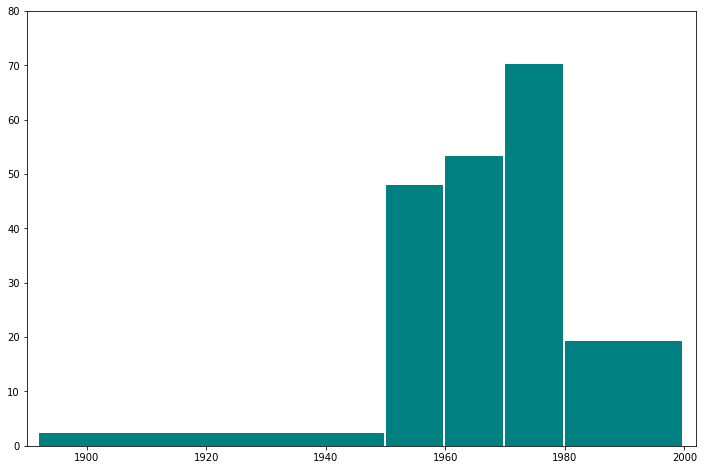

In [112]:
year_edge = [1892, 1950, 1960, 1970, 1980, 2000]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)

plt.plot()
plt.xlim(1890, 2002)
plt.ylim(0, 80)
for i in range(5):
    area = mpl.patches.Rectangle((year_edge[i], 0), histo['Width'][i]-.5, histo['Freqency Density'][i], linewidth=1, color='teal')
    ax.add_patch(area)

# fig.show()